# **Matplotlib 외부폰트 사용법 정리**

### **1. Matplotlib Import**

- Anaconda 설치 후 새로운 폰트를 설치한 경우라면 **Anaconda에서 폰트를 인식하지 못하는데,** 우선 아래 폴더를 삭제해 준다.
- (Windows 운영체제의 경우) **C:\Users\{사용자 이름}\.matplotlib**

단, 

- 1번과 2번 과정은 아나콘다를 설치한 후 새로운 폰트를 적용하고자 할 때 사용하는 방법이다.
- **아나콘다 설치 전에** 폰트가 설치되어 있었다면, 바로 3번으로 넘어가도 된다.
- 다만, 아나콘다가 윈도우 폰트를 제대로 인식하는지 확인하고자 한다면 아래 과정을 따라가면 된다.

이후 아래의 코드를 실행하자.

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm._rebuild() # <- 코드로 아나콘다에서 인식하지 못한 폰트를 업데이트 해준다.

### **2. 윈도우 폰트파일에서 원하는 글꼴 이름을 검색**

In [14]:
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fav_font_file_path_lst = filter(lambda x: True if "Nanum" in x or "BM" in x else False
                                , font_file_path_list)  # 'Nanum or Bm'을 포함하는 폰트 찾기 
 
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)  # 새로 설치한 폰트가 적용되었는지 확인

C:\Windows\Fonts\NanumSquareRoundB.ttf
C:\Windows\Fonts\NanumBarunGothic.ttf
C:\Windows\Fonts\NanumGothicLight.ttf
C:\Windows\Fonts\NanumGothic.ttf
C:\Windows\Fonts\NanumSquareRoundL.ttf
C:\Windows\Fonts\NanumBarunGothicBold.ttf
C:\Windows\Fonts\NanumBarunpenB.ttf
C:\Windows\Fonts\NanumBarunGothicUltraLight.ttf
C:\Windows\Fonts\NanumBarunpenR.ttf
C:\Windows\Fonts\NanumGothicBold.ttf
C:\Windows\Fonts\NanumMyeongjoBold.ttf
C:\Windows\Fonts\NanumBrush.ttf
C:\Windows\Fonts\NanumSquareRoundEB.ttf
C:\Windows\Fonts\NanumMyeongjo.ttf
C:\Windows\Fonts\NanumPen.ttf
C:\Windows\Fonts\YBMG05.TTF
C:\Windows\Fonts\NanumBarunGothicLight.ttf
C:\Windows\Fonts\NanumMyeongjoExtraBold.ttf
C:\Windows\Fonts\NanumGothicExtraBold.ttf
C:\Windows\Fonts\BMDOHYEON_ttf.ttf
C:\Windows\Fonts\NanumSquareRoundR.ttf
C:\Windows\Fonts\BMHANNA_11yrs_ttf.ttf


### **3. 전역 폰트 설정**

- 전역 폰트는 주피터 파일에 한번에 적용하는 폰트 설정을 말한다.
- 원하는 폰트와 폰트사이즈를 선택했다면, 다른 주피터 실행 파일에서는 아래 코드만 실행하면 된다.
- 이 방법은 파일을 새로 생성할 때 마다 실행해줘야 한다. 
<br>

- ~~아예 주피터노트북 전체 기본설정을 가진 matplotlibbrc 파일을 직접 수정하는경우 폰트가 적용되지 않았다. 방법은 추후에..~~.  

### **4. 폰트 사용 예시**

#### **4.1 복사용**

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fm._rebuild() # <- 코드로 아나콘다에서 인식하지 못한 폰트를 업데이트 해준다.

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'  # 원하는 폰트 
font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family

%matplotlib inline 

#### **4.2 설명**

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

font_fname = 'C:/Windows/Fonts/NanumBarunGothic.ttf'  # NanumBarunGothic.ttf를 원하는 폰트명으로 바꾼다.
font_family = fm.FontProperties(fname=font_fname).get_name()  # 해당 폰트명에서 폰트 패밀리 이름(영문)을 가져온다.
print(font_family)                         # 설정한 폰트의 폰트 패밀리명 확인

# 주피터노트북의 경우, 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정
%matplotlib inline 

NanumBarunGothic


- 주의할 점으로는 `plt.rcParams['font.family'] = font_family`등의 전역설정코드와 Plot을 생성하는 `plt.title("Plot", size = 30)`등의 코드를 같이 실행해줘야 한다. (최초 실행시)

- 같이 실행하지 않는 경우, 전역 설정이 적용되지 않는다.

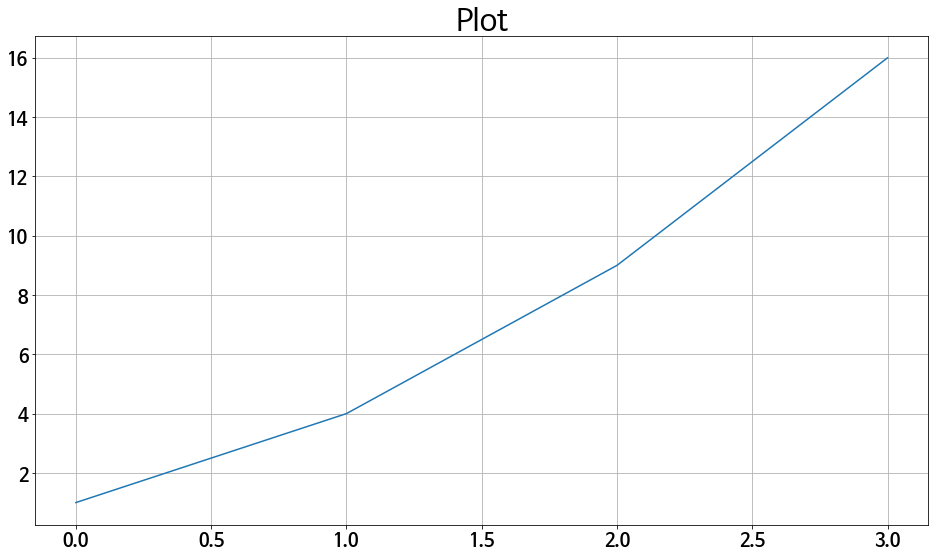

In [23]:
plt.rcParams['font.family'] = font_family  # 폰트패밀리 이름을 전역 폰트로 설정해준다.
plt.rcParams["font.size"] = 18             # 전역 폰트 사이즈 
plt.rcParams["figure.figsize"] = (16,9)    # pigure size 설정 (가로, 세로)

mpl.rc('axes', unicode_minus=False)        # 마이너스('-') 폰트 깨지는 문제에 대한 대처
# --------------------------------------------------------------------------------------

plt.title("Plot", size = 30)
plt.plot([1, 4, 9, 16])
plt.grid(True)
plt.show()

### **4. Plot별 폰트 설정 방법**

-  만약 개별적으로 폰트를 적용하고 싶을 때는 다음과 같이 폰트 패밀리, 색상, 크기를 정하여 플롯 명령의 fontdict 인수에 넣는다.
- 단, 나눔명조, 나눔바른펜, 나눔바른고딕 등의 폰트가 설치되어있어야 아래 코드가 적용된다.


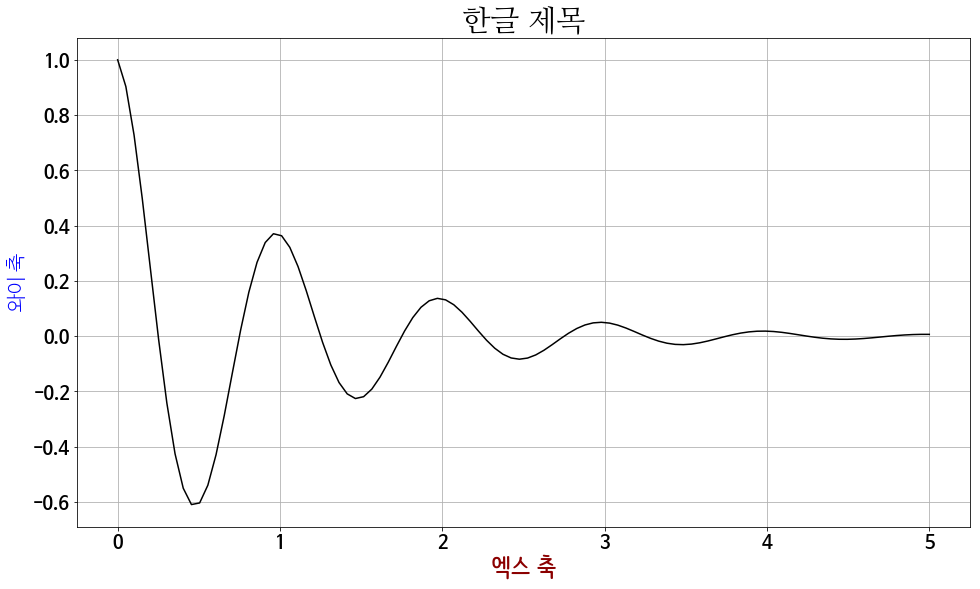

In [27]:
font1 = {'family': 'NanumMyeongjo', 'color':  'black', 'size': 30}
font2 = {'family': 'NanumBarunpen',
         'color':  'darkred', 'weight': 'bold', 'size': 25}
font3 = {'family': 'NanumBarunGothic',
         'color':  'blue', 'weight': 'light', 'size': 20}

x = np.linspace(0.0, 5.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)

plt.plot(x, y, 'k')
plt.title('한글 제목', fontdict=font1)
plt.xlabel('엑스 축', fontdict=font2)
plt.ylabel('와이 축', fontdict=font3)
plt.subplots_adjust()
plt.grid(True)
plt.show()

### **한글폰트 적용 참고사이트**

- [Matplotlib에서 한글 폰트 사용하기](https://programmers.co.kr/learn/courses/21/lessons/950) 
- [Matplotlib + 한글 (Windows 아나콘다)](https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html) 
- [jupyter에서 matplotlib를 위해 한글폰트를 가져다 쓰는 방법](https://gist.github.com/rollin96/b1a7e123023ade8ebfe11d1dc6ea2db8) 